# Scikit-learn

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from sklearn.datasets import fetch_california_housing, load_iris, load_boston

In [6]:
housing = pd.read_csv('datasets/housing/housing.csv')

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1757a860>,
      dtype=object)

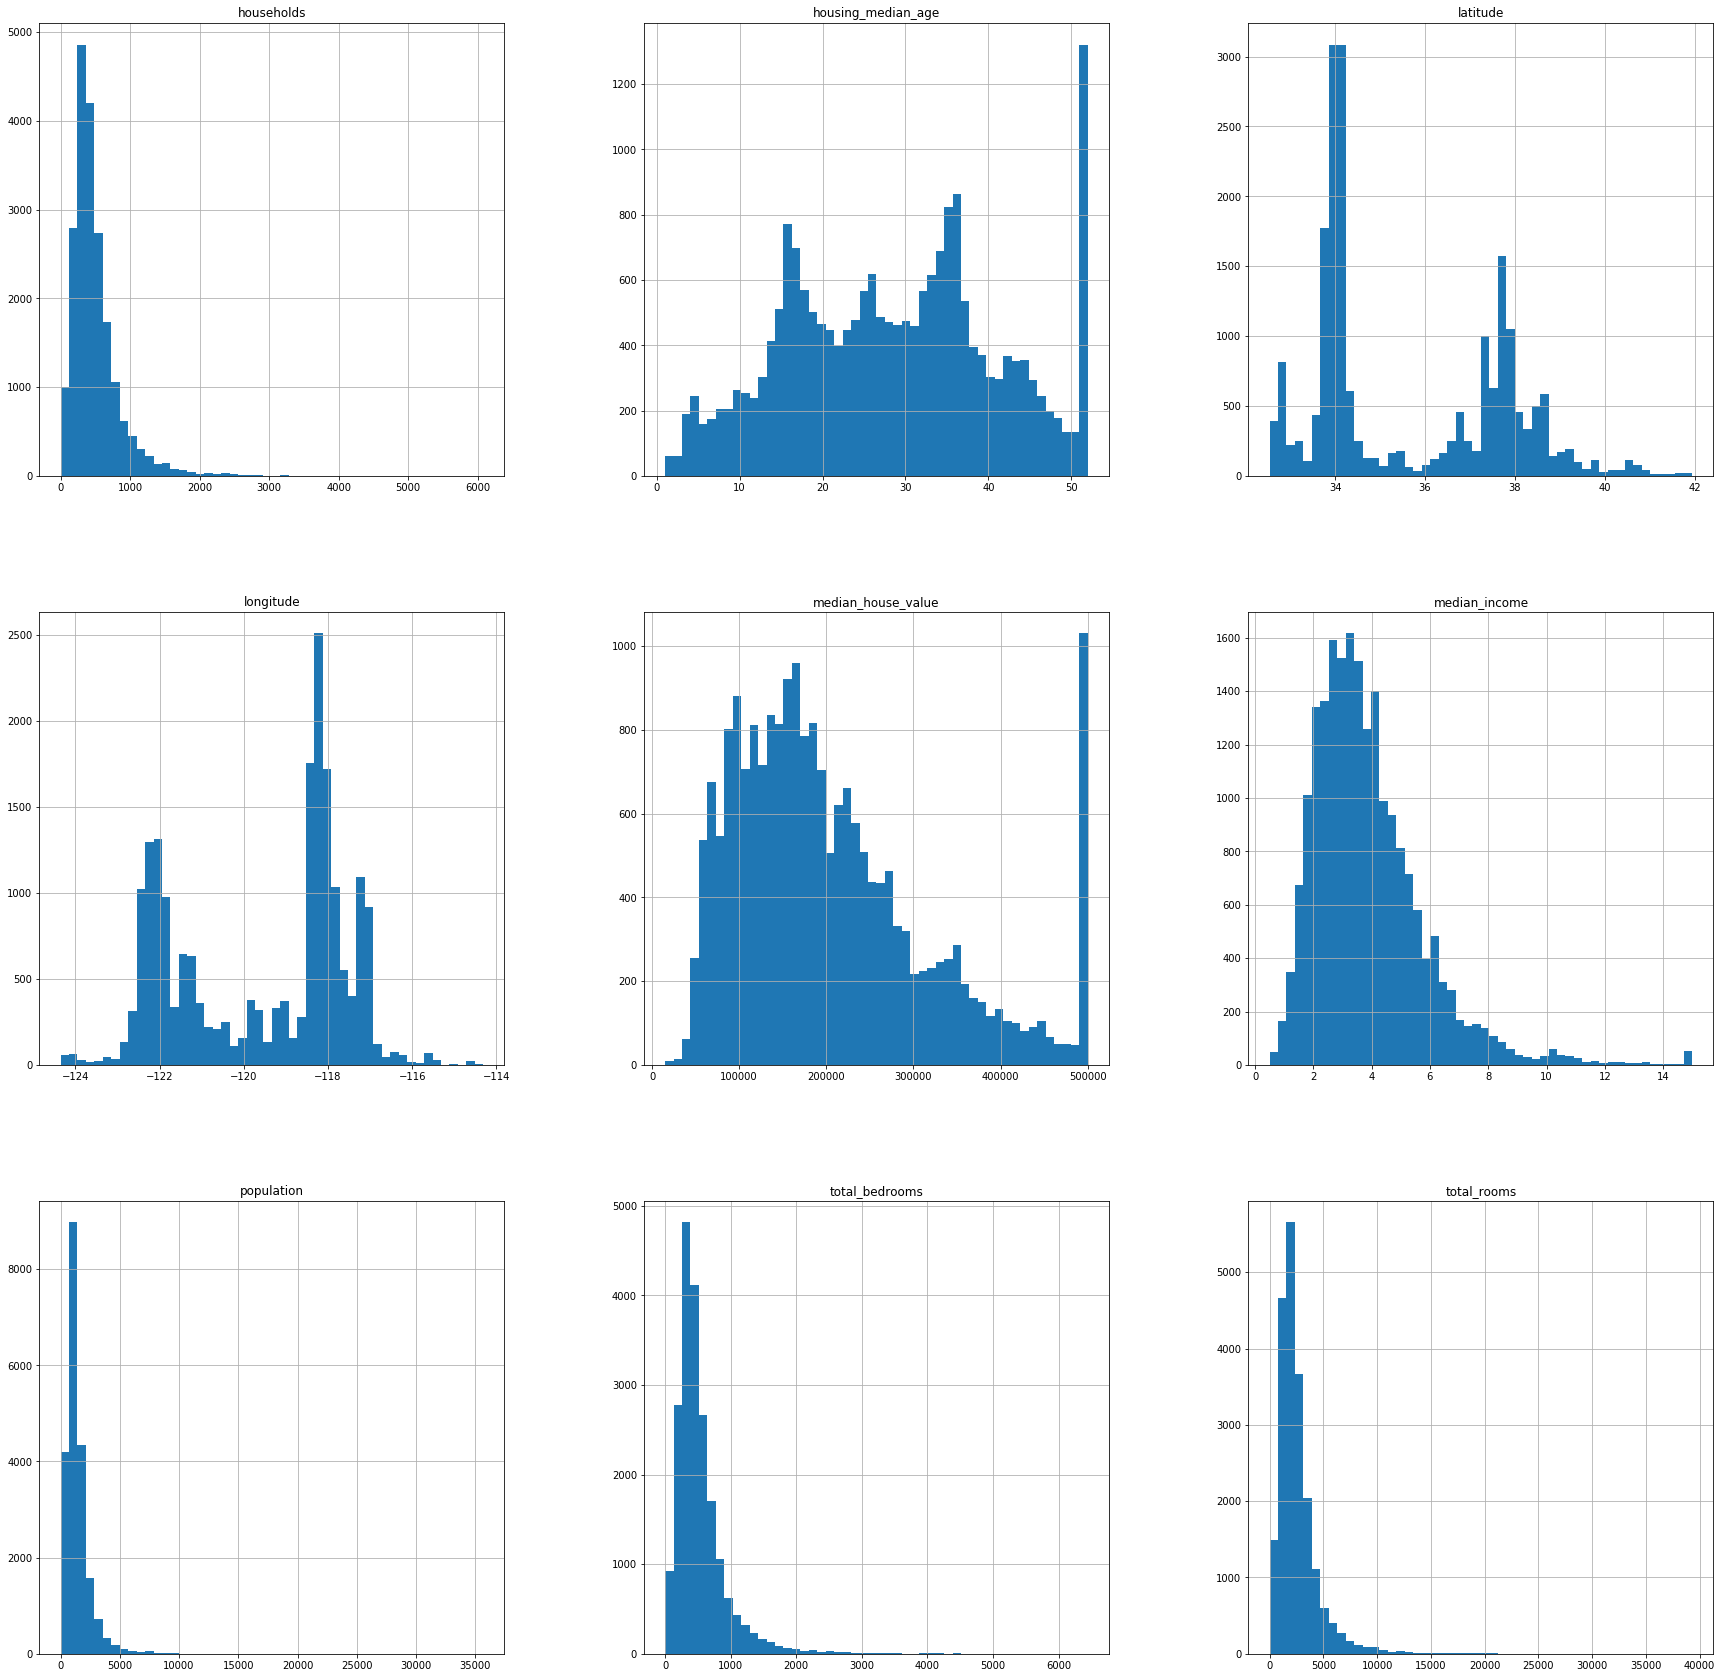

In [12]:
housing.hist(figsize=(30, 30), bins=50)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set, test_set = train_test_split(housing, test_size=0.2)

In [15]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18284,-122.10,37.38,37.0,4167.0,612.0,1577.0,597.0,7.5655,500001.0,NEAR BAY
19924,-119.33,36.32,20.0,2025.0,328.0,1039.0,346.0,3.5313,82800.0,INLAND
11592,-118.04,33.78,26.0,3642.0,557.0,1623.0,569.0,5.8426,259400.0,<1H OCEAN
18065,-122.04,37.24,24.0,1521.0,209.0,539.0,192.0,11.1557,500001.0,<1H OCEAN
2926,-119.01,35.36,36.0,2658.0,626.0,1490.0,529.0,1.2157,57000.0,INLAND


In [16]:
train_set.size

165120

In [17]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8099,-118.22,33.81,41.0,726.0,166.0,602.0,183.0,3.7885,156900.0,NEAR OCEAN
7844,-118.18,33.90,31.0,2536.0,603.0,2625.0,576.0,3.0909,150900.0,<1H OCEAN
3692,-118.36,34.21,41.0,337.0,65.0,198.0,50.0,1.8929,152900.0,<1H OCEAN
9054,-118.13,34.70,34.0,1943.0,500.0,1078.0,446.0,1.1296,93800.0,INLAND
7473,-118.20,33.93,36.0,2210.0,634.0,2341.0,553.0,2.1715,131100.0,<1H OCEAN


In [18]:
test_set.size

41280

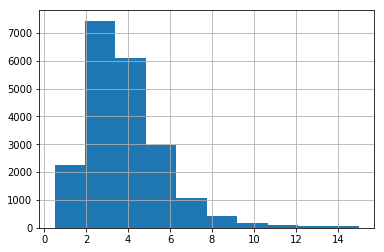

In [19]:
housing['median_income'].hist()

In [20]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

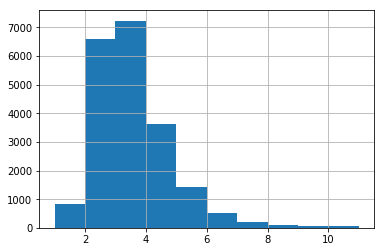

In [21]:
housing['income_cat'].hist()

In [22]:
housing['income_cat'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [23]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

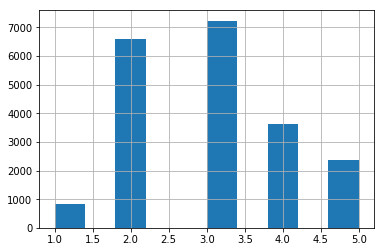

In [24]:
housing['income_cat'].hist()

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

In [26]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

In [27]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    s_train_set = housing.loc[train_index]
    s_test_set = housing.loc[test_index]

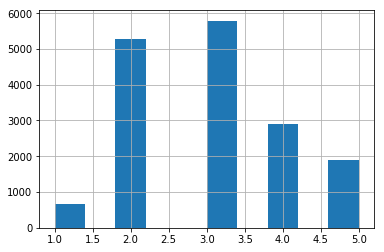

In [28]:
s_train_set['income_cat'].hist()

In [29]:
housing = s_train_set.copy()

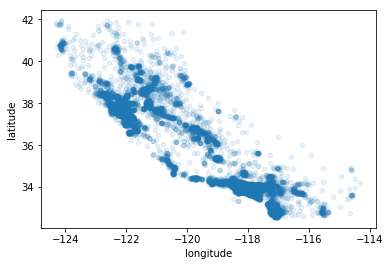

In [30]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

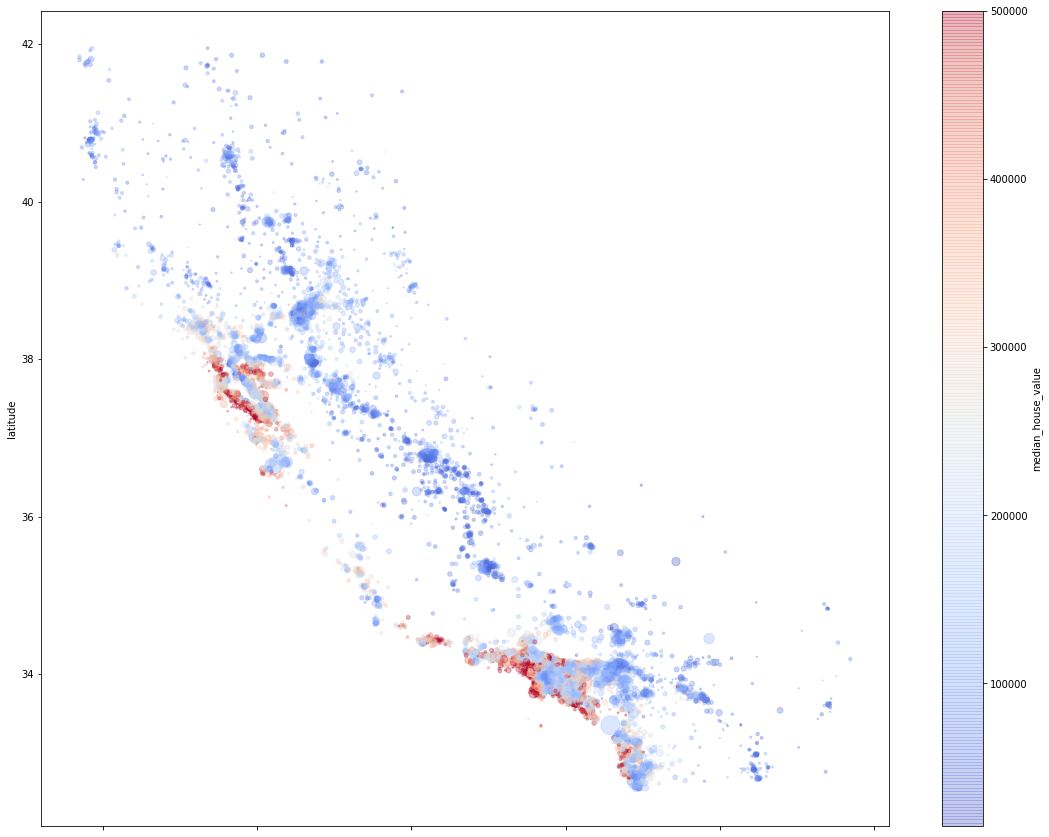

In [31]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, s=housing['population']/100, c='median_house_value', figsize=(19, 15),cmap=plt.get_cmap('coolwarm'), colorbar=True)

In [32]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924643,-0.113755,0.048577,0.071348,0.099558,0.056132,-0.009853,-0.042521,-0.005679
latitude,-0.924643,1.000000,0.016814,-0.038760,-0.067327,-0.108362,-0.071377,-0.085342,-0.147459,-0.089575
housing_median_age,-0.113755,0.016814,1.000000,-0.363800,-0.325046,-0.299183,-0.306837,-0.115632,0.103705,-0.145224
total_rooms,0.048577,-0.038760,-0.363800,1.000000,0.930874,0.858133,0.918135,0.201487,0.136831,0.221799
total_bedrooms,0.071348,-0.067327,-0.325046,0.930874,1.000000,0.877815,0.979117,-0.003970,0.051702,0.017994
population,0.099558,-0.108362,-0.299183,0.858133,0.877815,1.000000,0.907503,0.010655,-0.019767,0.029815
households,0.056132,-0.071377,-0.306837,0.918135,0.979117,0.907503,1.000000,0.017144,0.069137,0.040944
median_income,-0.009853,-0.085342,-0.115632,0.201487,-0.003970,0.010655,0.017144,1.000000,0.689958,0.904408
median_house_value,-0.042521,-0.147459,0.103705,0.136831,0.051702,-0.019767,0.069137,0.689958,1.000000,0.645832
income_cat,-0.005679,-0.089575,-0.145224,0.221799,0.017994,0.029815,0.040944,0.904408,0.645832,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21ea8e10>,
      dtype=object)

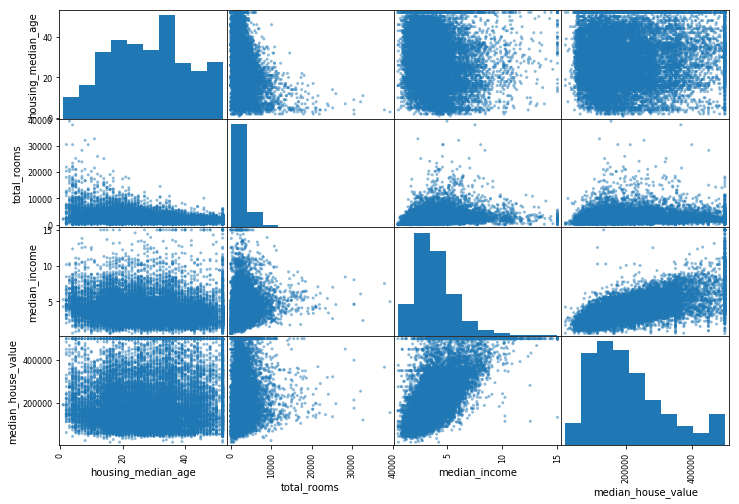

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']], figsize=(12, 8))

In [34]:
housing = s_train_set.copy()

In [35]:
housing.drop('median_house_value', axis=1, inplace=True)

In [36]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12318,-116.39,33.82,15.0,11115.0,2257.0,4122.0,1653.0,2.7219,INLAND,2.0
3148,-118.34,35.27,10.0,2939.0,605.0,1167.0,446.0,2.3917,INLAND,2.0
10219,-117.88,33.89,16.0,959.0,176.0,353.0,185.0,4.5000,<1H OCEAN,3.0
19495,-121.01,37.66,36.0,3679.0,613.0,1366.0,581.0,4.5000,INLAND,3.0
1399,-122.08,37.96,21.0,9135.0,1534.0,3748.0,1502.0,6.0859,NEAR BAY,5.0


In [37]:
housing_labels = s_train_set['median_house_value'].copy()

In [38]:
housing_labels.tail()

12318     74400.0
3148      79000.0
10219    173300.0
19495    151400.0
1399     266000.0
Name: median_house_value, dtype: float64

In [39]:
housing.tail()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12318,-116.39,33.82,15.0,11115.0,2257.0,4122.0,1653.0,2.7219,INLAND,2.0
3148,-118.34,35.27,10.0,2939.0,605.0,1167.0,446.0,2.3917,INLAND,2.0
10219,-117.88,33.89,16.0,959.0,176.0,353.0,185.0,4.5000,<1H OCEAN,3.0
19495,-121.01,37.66,36.0,3679.0,613.0,1366.0,581.0,4.5000,INLAND,3.0
1399,-122.08,37.96,21.0,9135.0,1534.0,3748.0,1502.0,6.0859,NEAR BAY,5.0


In [40]:
incomplete_rows = housing[housing.isnull().any(axis=1)]

In [41]:
incomplete_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [42]:
incomplete_rows.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
11311,-117.96,33.78,33.0,1520.0,658.0,242.0,4.8750,<1H OCEAN,4.0
20372,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN,4.0
4043,-118.50,34.17,37.0,880.0,369.0,155.0,4.1429,<1H OCEAN,3.0
6052,-117.76,34.04,34.0,1914.0,1564.0,328.0,2.8347,INLAND,2.0
13015,-121.19,38.71,11.0,4415.0,1520.0,627.0,3.2321,INLAND,3.0
14386,-117.23,32.75,5.0,1824.0,892.0,426.0,3.4286,NEAR OCEAN,3.0
14173,-117.05,32.75,36.0,2024.0,1030.0,390.0,3.8233,NEAR OCEAN,3.0
9942,-122.23,38.17,45.0,350.0,225.0,72.0,1.8942,NEAR BAY,2.0
6541,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN,3.0
17973,-121.95,37.31,27.0,4140.0,2135.0,893.0,3.6292,<1H OCEAN,3.0


In [43]:
incomplete_rows['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [44]:
incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
11311,-117.96,33.78,33.0,1520.0,435.0,658.0,242.0,4.8750,<1H OCEAN,4.0
20372,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033,<1H OCEAN,4.0
4043,-118.50,34.17,37.0,880.0,435.0,369.0,155.0,4.1429,<1H OCEAN,3.0
6052,-117.76,34.04,34.0,1914.0,435.0,1564.0,328.0,2.8347,INLAND,2.0
13015,-121.19,38.71,11.0,4415.0,435.0,1520.0,627.0,3.2321,INLAND,3.0


In [45]:
from sklearn.preprocessing import Imputer

In [46]:
imputer = Imputer(strategy='median')

In [47]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12318,-116.39,33.82,15.0,11115.0,2257.0,4122.0,1653.0,2.7219,INLAND,2.0
3148,-118.34,35.27,10.0,2939.0,605.0,1167.0,446.0,2.3917,INLAND,2.0
10219,-117.88,33.89,16.0,959.0,176.0,353.0,185.0,4.5000,<1H OCEAN,3.0
19495,-121.01,37.66,36.0,3679.0,613.0,1366.0,581.0,4.5000,INLAND,3.0
1399,-122.08,37.96,21.0,9135.0,1534.0,3748.0,1502.0,6.0859,NEAR BAY,5.0


In [48]:
numerical_housing = housing.drop('ocean_proximity', axis=1)

In [49]:
numerical_housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12318,-116.39,33.82,15.0,11115.0,2257.0,4122.0,1653.0,2.7219,2.0
3148,-118.34,35.27,10.0,2939.0,605.0,1167.0,446.0,2.3917,2.0
10219,-117.88,33.89,16.0,959.0,176.0,353.0,185.0,4.5000,3.0
19495,-121.01,37.66,36.0,3679.0,613.0,1366.0,581.0,4.5000,3.0
1399,-122.08,37.96,21.0,9135.0,1534.0,3748.0,1502.0,6.0859,5.0


In [50]:
imputer.fit(numerical_housing)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [51]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2128.    ,  435.    , 1166.    ,
        408.    ,    3.5355,    3.    ])

In [52]:
numerical_housing.median().values

array([-118.49  ,   34.25  ,   29.    , 2128.    ,  435.    , 1166.    ,
        408.    ,    3.5355,    3.    ])

In [53]:
X = imputer.transform(numerical_housing)

In [54]:
transformed_housing = pd.DataFrame(X, columns=numerical_housing.columns, index = list(housing.index.values))

In [55]:
transformed_housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12318,-116.39,33.82,15.0,11115.0,2257.0,4122.0,1653.0,2.7219,2.0
3148,-118.34,35.27,10.0,2939.0,605.0,1167.0,446.0,2.3917,2.0
10219,-117.88,33.89,16.0,959.0,176.0,353.0,185.0,4.5000,3.0
19495,-121.01,37.66,36.0,3679.0,613.0,1366.0,581.0,4.5000,3.0
1399,-122.08,37.96,21.0,9135.0,1534.0,3748.0,1502.0,6.0859,5.0


In [56]:
transformed_housing.loc[incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
11311,-117.96,33.78,33.0,1520.0,435.0,658.0,242.0,4.8750,4.0
20372,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033,4.0
4043,-118.50,34.17,37.0,880.0,435.0,369.0,155.0,4.1429,3.0
6052,-117.76,34.04,34.0,1914.0,435.0,1564.0,328.0,2.8347,2.0
13015,-121.19,38.71,11.0,4415.0,435.0,1520.0,627.0,3.2321,3.0
14386,-117.23,32.75,5.0,1824.0,435.0,892.0,426.0,3.4286,3.0
14173,-117.05,32.75,36.0,2024.0,435.0,1030.0,390.0,3.8233,3.0
9942,-122.23,38.17,45.0,350.0,435.0,225.0,72.0,1.8942,2.0
6541,-118.05,34.04,33.0,1348.0,435.0,1098.0,257.0,4.2917,3.0
17973,-121.95,37.31,27.0,4140.0,435.0,2135.0,893.0,3.6292,3.0


In [57]:
housing_cat = housing[['ocean_proximity']]

In [58]:
housing_cat.tail()

,ocean_proximity
12318,INLAND
3148,INLAND
10219,<1H OCEAN
19495,INLAND
1399,NEAR BAY


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [61]:
le_encoded_housing_cat = le.fit_transform(housing_cat)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
le_encoded_housing_cat

array([4, 3, 0, ..., 0, 1, 3])

In [63]:
le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [68]:
from custom_encoders import OrdinalEncoder

In [70]:
oridinal_encoder = OrdinalEncoder()

In [72]:
housing_cat_encoded = oridinal_encoder.fit_transform(housing_cat)

In [76]:
housing_cat_encoded[:10]

array([[4.],
       [3.],
       [0.],
       [3.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [77]:
oridinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [79]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5660,-118.31,33.73,52.0,2025.0,361.0,957.0,363.0,4.2059,NEAR OCEAN,3.0
15904,-122.41,37.74,48.0,409.0,86.0,148.0,70.0,3.6687,NEAR BAY,3.0
8576,-118.42,33.90,43.0,1394.0,321.0,552.0,296.0,5.9596,<1H OCEAN,4.0
15695,-122.45,37.79,52.0,3069.0,579.0,1107.0,536.0,5.5634,NEAR BAY,4.0
15355,-117.32,33.25,7.0,8206.0,1523.0,4399.0,1423.0,3.6301,<1H OCEAN,3.0


In [80]:
from custom_encoders import OneHotEncoder

In [81]:
onehot_encoder = OneHotEncoder()

In [82]:
housing_cat_onehot_encoded = onehot_encoder.fit_transform(housing_cat)

In [83]:
housing_cat_onehot_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [84]:
housing_cat_onehot_encoded.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [85]:
housing_cat

,ocean_proximity
5660,NEAR OCEAN
15904,NEAR BAY
8576,<1H OCEAN
15695,NEAR BAY
15355,<1H OCEAN
5389,<1H OCEAN
1930,INLAND
17533,<1H OCEAN
6118,<1H OCEAN
1886,INLAND


In [86]:
onehot_encoder = OneHotEncoder(sparse=False)

In [87]:
housing_cat_onehot_encoded = onehot_encoder.fit_transform(housing_cat)

In [88]:
housing_cat_onehot_encoded

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [89]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [90]:
from sklearn.base import BaseEstimator, TransformerMixin

In [92]:
rooms_i, bedrooms_i, population_i, household_i = 3, 4, 5, 6

In [97]:
class CustomTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_i] / X[:, household_i]
        population_per_household = X[:, population_i] / X[:, household_i]
        if self.add_bedrooms_per_room: 
            bedrooms_per_household = X[:, bedrooms_i] / X[:, household_i]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_household]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [98]:
custom_features = CustomTranformer(add_bedrooms_per_room=False)

In [99]:
housing_with_custom_features = custom_features.transform(housing.values)

In [100]:
housing_with_custom_features

array([[-118.31, 33.73, 52.0, ..., 3.0, 5.578512396694215,
        2.6363636363636362],
       [-122.41, 37.74, 48.0, ..., 3.0, 5.8428571428571425,
        2.1142857142857143],
       [-118.42, 33.9, 43.0, ..., 4.0, 4.70945945945946,
        1.864864864864865],
       ...,
       [-117.88, 33.89, 16.0, ..., 3.0, 5.183783783783784,
        1.9081081081081082],
       [-121.01, 37.66, 36.0, ..., 3.0, 6.332185886402754,
        2.351118760757315],
       [-122.08, 37.96, 21.0, ..., 5.0, 6.081890812250333,
        2.4953395472703064]], dtype=object)

In [102]:
housing_with_custom_columns_df = pd.DataFrame(housing_with_custom_features,
                                              columns=list(housing.columns) + ['rooms_per_household', 'population_per_household'])

In [104]:
housing_with_custom_columns_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
0,-118.31,33.73,52,2025,361,957,363,4.2059,NEAR OCEAN,3,5.57851,2.63636
1,-122.41,37.74,48,409,86,148,70,3.6687,NEAR BAY,3,5.84286,2.11429
2,-118.42,33.9,43,1394,321,552,296,5.9596,<1H OCEAN,4,4.70946,1.86486
3,-122.45,37.79,52,3069,579,1107,536,5.5634,NEAR BAY,4,5.72575,2.0653
4,-117.32,33.25,7,8206,1523,4399,1423,3.6301,<1H OCEAN,3,5.76669,3.09136


In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [107]:
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('custom_transform', CustomTranformer()),
    ('std_scaler', StandardScaler()),
])

housing_num = num_pipeline.fit_transform(numerical_housing)

In [108]:
housing_num

array([[ 0.62456693, -0.89039716,  1.86137117, ...,  0.05424821,
        -0.04008526, -0.20040165],
       [-1.41821877,  0.99084946,  1.54393175, ...,  0.15908659,
        -0.08926586,  0.23305205],
       [ 0.56976048, -0.81064356,  1.14713247, ..., -0.29041574,
        -0.11276172, -0.03380364],
       ...,
       [ 0.83881031, -0.81533495, -0.9955836 , ..., -0.10230005,
        -0.10868814, -0.28028321],
       [-0.72068219,  0.95331836,  0.59161349, ...,  0.35315298,
        -0.0669558 , -0.08821103],
       [-1.25379943,  1.09406   , -0.59878433, ...,  0.25388666,
        -0.05336996, -0.15074845]])

In [112]:
class DataAttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [113]:
num_attributes = list(numerical_housing)


In [115]:
cat_attributes = ['ocean_proximity']

In [120]:
num_pipeline = Pipeline([
    ('selector', DataAttributeSelector(num_attributes)),
    ('imputer', Imputer(strategy='median')),
    ('custom_transform', CustomTranformer()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataAttributeSelector(cat_attributes)),
    ('one_hot_encoder', OneHotEncoder(sparse=False)),
])

In [121]:
from sklearn.pipeline import FeatureUnion

In [122]:
housing_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [123]:
housing_processed = housing_pipeline.fit_transform(housing)

In [124]:
housing_processed

array([[ 0.62456693, -0.89039716,  1.86137117, ...,  0.        ,
         0.        ,  1.        ],
       [-1.41821877,  0.99084946,  1.54393175, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56976048, -0.81064356,  1.14713247, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.83881031, -0.81533495, -0.9955836 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.72068219,  0.95331836,  0.59161349, ...,  0.        ,
         0.        ,  0.        ],
       [-1.25379943,  1.09406   , -0.59878433, ...,  0.        ,
         1.        ,  0.        ]])

In [125]:
housing_processed.shape

(16512, 17)

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
lin_reg = LinearRegression()

In [129]:
lin_reg.fit(housing_processed, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
sample_data = housing.iloc[:10]

In [131]:
sample_labels = housing_labels[:10]

In [132]:
sample_processed_data = housing_pipeline.transform(sample_data)

In [133]:
lin_reg.predict(sample_processed_data)

array([273509.40228582, 244536.51312912, 336252.93057656, 343292.1247091 ,
       187452.07395254, 315992.48507785, 199890.08727147, 178759.49866504,
       143271.84803012,  52715.73870621])

In [135]:
list(sample_labels)

[350000.0,
 335000.0,
 500001.0,
 500001.0,
 170900.0,
 275000.0,
 228900.0,
 204200.0,
 138500.0,
 90400.0]

In [136]:
from sklearn.metrics import mean_squared_error

In [137]:
housing_predictions = lin_reg.predict(housing_processed)

In [138]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [139]:
lin_rmse = np.sqrt(lin_mse)

In [140]:
lin_rmse

68140.12602528321

In [141]:
from sklearn.tree import DecisionTreeRegressor

In [142]:
dtree_reg = DecisionTreeRegressor()

In [143]:
dtree_reg.fit(housing_processed, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [145]:
housing_predictions = dtree_reg.predict(housing_processed)
dtree_mse = mean_squared_error(housing_labels, housing_predictions)
dtree_rmse = np.sqrt(dtree_mse)
dtree_rmse

0.0

In [146]:
from sklearn.model_selection import cross_val_score

In [147]:
scores = cross_val_score(dtree_reg,  housing_processed, housing_labels, scoring='neg_mean_squared_error', cv=10)

In [149]:
dtree_rmse_scores = np.sqrt(-scores)

In [150]:
dtree_rmse_scores

array([73357.36107667, 72960.82560891, 75245.43223673, 67212.62847538,
       68016.17724019, 72824.2103676 , 65307.454766  , 70279.61371966,
       70109.893603  , 70509.53596894])

In [152]:
dtree_rmse_scores.mean()

70582.3133063077

In [153]:
dtree_rmse_scores.std()

2936.206025479407

In [154]:
scores = cross_val_score(lin_reg,  housing_processed, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([68205.23788829, 66235.84307342, 72717.79120461, 66492.14433141,
       68154.49775148, 67775.65822675, 67527.17979883, 69631.82299505,
       67350.0306217 , 72078.77373635])

In [156]:
lin_rmse_scores.mean()

68616.89796278773

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [158]:
rnd_forest_reg = RandomForestRegressor()

In [159]:
rnd_forest_reg.fit(housing_processed, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [161]:
housing_predictions = rnd_forest_reg.predict(housing_processed)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22189.71414735925

In [162]:
scores = cross_val_score(rnd_forest_reg,  housing_processed, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores

array([53913.93976717, 54222.92558009, 54768.86536498, 52315.69915255,
       48398.19726494, 54033.95996592, 50469.67485318, 55266.91984625,
       52323.43331086, 51888.87991786])

In [163]:
forest_rmse_scores.mean()

52760.24950237962